# Section 3.1: Exploratory Component

An hourly bike utilization analysis will be carried out. A prediction of future bike utilization per hour will be made based on this research.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import sys
import seaborn as sns

In [2]:
# load data
df = pd.read_csv("Trips_2018.csv")
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [43]:
df = df.astype({"starttime": "datetime64"})
df= df.astype({"stoptime": "datetime64"})

In [44]:
# Here we select the features that we are interested in 
trips_1 = df[["tripduration", "start_station_id","start_day","starttime"]]

In [45]:
trips_1.head()

,tripduration,start_station_id,start_day,starttime
0,970,72.0,Monday,2018-01-01 13:50:57.434
1,723,72.0,Monday,2018-01-01 15:33:30.182
2,496,72.0,Monday,2018-01-01 15:39:18.337
3,306,72.0,Monday,2018-01-01 15:40:13.372
4,306,72.0,Monday,2018-01-01 18:14:51.568


In [46]:
#Next, we convert a new column of the hour and date with no minutes and seconds as we are not intrested in them
trips_1["start_date_hour"] = trips_1["starttime"].apply(lambda x: x.strftime("%Y-%m-%d %H:00"))

C:\Users\diana\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [47]:
trips_1.head()

,tripduration,start_station_id,start_day,starttime,start_date_hour
0,970,72.0,Monday,2018-01-01 13:50:57.434,2018-01-01 13:00
1,723,72.0,Monday,2018-01-01 15:33:30.182,2018-01-01 15:00
2,496,72.0,Monday,2018-01-01 15:39:18.337,2018-01-01 15:00
3,306,72.0,Monday,2018-01-01 15:40:13.372,2018-01-01 15:00
4,306,72.0,Monday,2018-01-01 18:14:51.568,2018-01-01 18:00


In [48]:
trips_1 = trips_1.astype({"start_date_hour": "datetime64"})

In [49]:
# we remove starttime as we will not use it anymore
trips_1 = trips_1.drop(columns=['starttime'])

In [52]:
trips_1 = trips_1.groupby(["start_date_hour"]).count()

In [53]:
trips_1.head()

,tripduration,start_station_id,start_day
start_date_hour,,,
2018-01-01 00:00:00,119,119,119
2018-01-01 01:00:00,168,168,168
2018-01-01 02:00:00,98,98,98
2018-01-01 03:00:00,72,72,72
2018-01-01 04:00:00,34,34,34


In [54]:
trips_1.shape

(8743, 3)

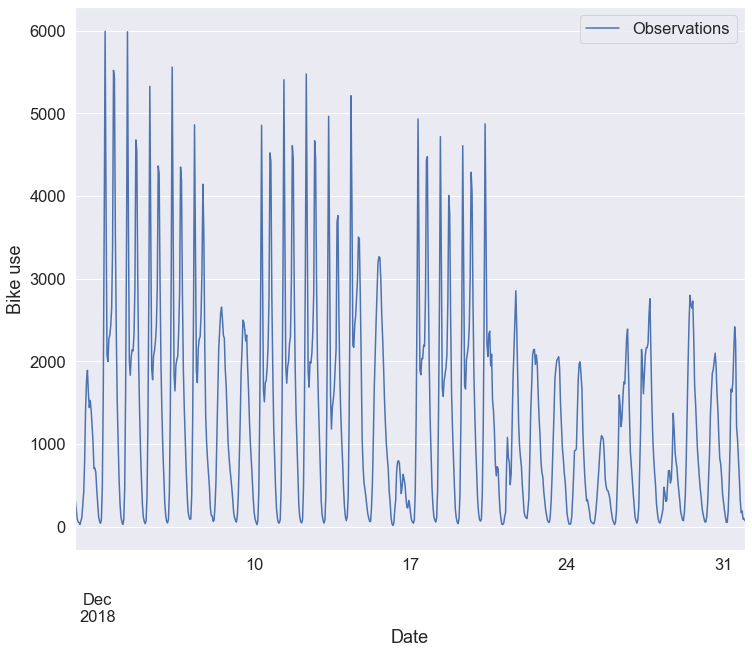

In [23]:
# Here we plot the amount of rides/ date
sns.set(rc={'figure.figsize':(12,10)})
sns.set(font_scale=1.5)
ax = trips_1["tripduration"].iloc[-720:].plot(label='Observations')
ax.set_xlabel('Date')
ax.set_ylabel('Bike use')
plt.legend()

plt.show()

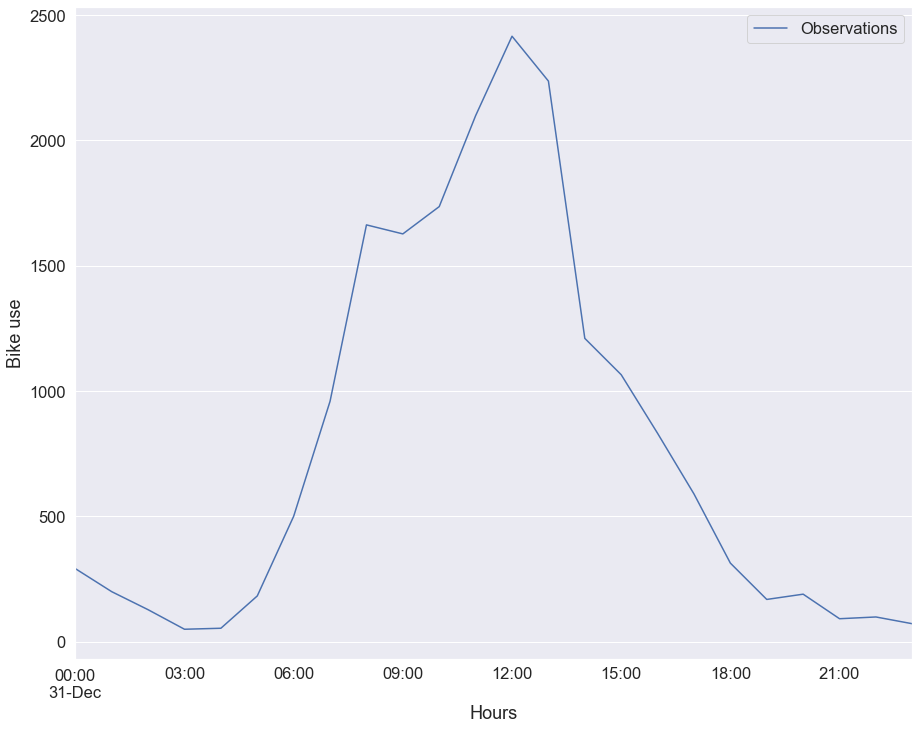

In [25]:
# Here we plot the amount of rides/ hours
sns.set(rc={'figure.figsize':(15,12)})
sns.set(font_scale=1.5)
ax = trips_1["tripduration"].iloc[-24:].plot(label='Observations')
ax.set_xlabel('Hours')
ax.set_ylabel('Bike use')
plt.legend()

plt.show()

# Appendix

In [27]:
from sklearn.linear_model import LogisticRegression
LogReg=LogisticRegression()

In [58]:
#Now we check for accuracy 

In [59]:
def buildLaggedFeatures(s,columns, lag=2,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [60]:
f_lagged=buildLaggedFeatures(f, ['tripduration'], lag=2)
fllen=len(f_lagged)

In [61]:
f_lagged.head()

,tripduration,start_station_id,start_day,tripduration_lag1,tripduration_lag2
start_date_hour,,,,,
2018-01-01 02:00:00,98,98,98,168.0,119.0
2018-01-01 03:00:00,72,72,72,98.0,168.0
2018-01-01 04:00:00,34,34,34,72.0,98.0
2018-01-01 05:00:00,26,26,26,34.0,72.0
2018-01-01 06:00:00,39,39,39,26.0,34.0


In [62]:
x=np.c_[np.ones(len(f_lagged)),f_lagged['tripduration_lag1'], f_lagged['tripduration_lag2']]

In [64]:
y=np.array(f_lagged['tripduration'], ndmin=2).T

In [66]:
from sklearn import datasets, linear_model
regr=linear_model.LinearRegression(fit_intercept=False)
regr.fit(x, y);

In [70]:
regr.score(x,y)


0.8278389059368665

Refernces:Code provided during the lectures
https://towardsdatascience.com/end-to-end-case-study-bike-sharing-demand-dataset-53201926c8db
https://rpubs.com/aashish/bikesharing_EDA
https://www.kaggle.com/c/bike-sharing-demand/code

Author:Diana Podoroghin-s194768